<a href="https://colab.research.google.com/github/kdChen07/LSCP_kd/blob/main/map%26color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 994 kB 2.6 MB/s 
     |████████████████████████████████| 6.3 MB 36.5 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [3]:
import numpy
import geopandas 
import pandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
from google.colab import files

In [16]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines

In [4]:
network_distance = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/distance8816.csv?raw=ture')
demand_points = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/MSOA380.csv?raw=ture')
facility_points = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/opt_points2738.csv?raw=ture')

In [5]:
tract = geopandas.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/England_basemap/MSOA_Boundary_with_population.gpkg?raw=true')
tract = tract.to_crs('epsg:4326')

In [9]:
tract

,MSOA11CD,MSOA11NM,pop0-49,pop50-59,pop60-69,pop70-79,pop80-89,pop90+,total_pop,geometry
0,E02000001,City of London 001,6206,1339,1025,720,313,118,9721,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151..."
1,E02000002,Barking and Dagenham 001,5621,835,505,401,268,105,7735,"POLYGON ((0.14984 51.59701, 0.15111 51.58708, ..."
2,E02000003,Barking and Dagenham 002,8062,1272,886,575,301,78,11174,"POLYGON ((0.14841 51.58075, 0.14978 51.56970, ..."
3,E02000004,Barking and Dagenham 003,4401,866,598,444,262,116,6687,"POLYGON ((0.19021 51.55268, 0.18602 51.54754, ..."
4,E02000005,Barking and Dagenham 004,7982,1144,629,413,211,53,10432,"POLYGON ((0.15441 51.56607, 0.14790 51.56109, ..."
...,...,...,...,...,...,...,...,...,...,...
6786,E02006930,Greenwich 037,7425,741,473,305,167,16,9127,"POLYGON ((0.02331 51.48469, 0.02018 51.48441, ..."
6787,E02006931,Greenwich 038,7267,1024,672,510,255,78,9806,"POLYGON ((-0.00284 51.48251, 0.00141 51.48214,..."
6788,E02006932,Liverpool 060,16963,264,173,80,25,10,17515,"POLYGON ((-2.96793 53.41177, -2.96814 53.40874..."
6789,E02006933,Liverpool 061,7130,603,485,220,97,4,8539,"POLYGON ((-2.97760 53.39957, -2.98328 53.39717..."


In [15]:
tract['dissolve']=1
MSOA_outline = tract.dissolve(by='dissolve')

In [8]:
sum1 = pandas.read_csv('6400&1600.csv')
sum1

,origin_id,number
0,E02000001,623
1,E02000002,69
2,E02000003,68
3,E02000004,42
4,E02000005,73
...,...,...
6403,E02006930,453
6404,E02006931,516
6405,E02006932,14
6406,E02006933,13


In [12]:
tract1 = pandas.merge(left = tract,right = sum1, how='right', left_on='MSOA11CD', right_on='origin_id')
tract1

,MSOA11CD,MSOA11NM,pop0-49,pop50-59,pop60-69,pop70-79,pop80-89,pop90+,total_pop,geometry,origin_id,number
0,E02000001,City of London 001,6206,1339,1025,720,313,118,9721,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151...",E02000001,623
1,E02000002,Barking and Dagenham 001,5621,835,505,401,268,105,7735,"POLYGON ((0.14984 51.59701, 0.15111 51.58708, ...",E02000002,69
2,E02000003,Barking and Dagenham 002,8062,1272,886,575,301,78,11174,"POLYGON ((0.14841 51.58075, 0.14978 51.56970, ...",E02000003,68
3,E02000004,Barking and Dagenham 003,4401,866,598,444,262,116,6687,"POLYGON ((0.19021 51.55268, 0.18602 51.54754, ...",E02000004,42
4,E02000005,Barking and Dagenham 004,7982,1144,629,413,211,53,10432,"POLYGON ((0.15441 51.56607, 0.14790 51.56109, ...",E02000005,73
...,...,...,...,...,...,...,...,...,...,...,...,...
6403,E02006930,Greenwich 037,7425,741,473,305,167,16,9127,"POLYGON ((0.02331 51.48469, 0.02018 51.48441, ...",E02006930,453
6404,E02006931,Greenwich 038,7267,1024,672,510,255,78,9806,"POLYGON ((-0.00284 51.48251, 0.00141 51.48214,...",E02006931,516
6405,E02006932,Liverpool 060,16963,264,173,80,25,10,17515,"POLYGON ((-2.96793 53.41177, -2.96814 53.40874...",E02006932,14
6406,E02006933,Liverpool 061,7130,603,485,220,97,4,8539,"POLYGON ((-2.97760 53.39957, -2.98328 53.39717...",E02006933,13


In [37]:
tract12 =tract1.loc[tract1['number']<=1]
tract13 =tract1.loc[(tract1['number']>1)&(tract1['number']<=10)]
tract14 =tract1.loc[(tract1['number']>10)&(tract1['number']<=50)]
tract15 =tract1.loc[(tract1['number']>50)&(tract1['number']<=100)]
tract16 =tract1.loc[tract1['number']>100]
# tract17 =tract1.loc[(tract1['number']>700)&(tract1['number']<=100)]
# tract18 =tract1.loc[(tract1['number']>700)&(tract1['number']<=600)]

In [38]:
tract16

,MSOA11CD,MSOA11NM,pop0-49,pop50-59,pop60-69,pop70-79,pop80-89,pop90+,total_pop,geometry,origin_id,number
0,E02000001,City of London 001,6206,1339,1025,720,313,118,9721,"POLYGON ((-0.08519 51.52034, -0.07845 51.52151...",E02000001,623
10,E02000012,Barking and Dagenham 011,8428,1196,820,481,282,84,11291,"POLYGON ((0.10694 51.54955, 0.10965 51.54585, ...",E02000012,113
14,E02000016,Barking and Dagenham 015,8705,748,345,159,56,8,10021,"POLYGON ((0.07148 51.54364, 0.07797 51.54409, ...",E02000016,196
15,E02000017,Barking and Dagenham 016,7243,869,618,315,202,28,9275,"POLYGON ((0.09377 51.53768, 0.09418 51.53322, ...",E02000017,144
16,E02000018,Barking and Dagenham 017,7503,992,604,326,183,41,9649,"POLYGON ((0.12226 51.53465, 0.12227 51.53438, ...",E02000018,135
...,...,...,...,...,...,...,...,...,...,...,...,...
6400,E02006927,Greenwich 034,7259,1226,818,721,347,91,10462,"POLYGON ((0.02995 51.46592, 0.02980 51.46194, ...",E02006927,365
6401,E02006928,Greenwich 035,10623,786,438,235,45,12,12139,"MULTIPOLYGON (((-0.01217 51.47792, -0.02151 51...",E02006928,528
6402,E02006929,Greenwich 036,10934,957,582,316,196,34,13019,"POLYGON ((0.02955 51.49396, 0.03112 51.48803, ...",E02006929,448
6403,E02006930,Greenwich 037,7425,741,473,305,167,16,9127,"POLYGON ((0.02331 51.48469, 0.02018 51.48441, ...",E02006930,453


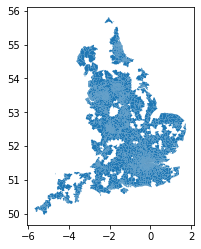

In [14]:
tract1.plot()

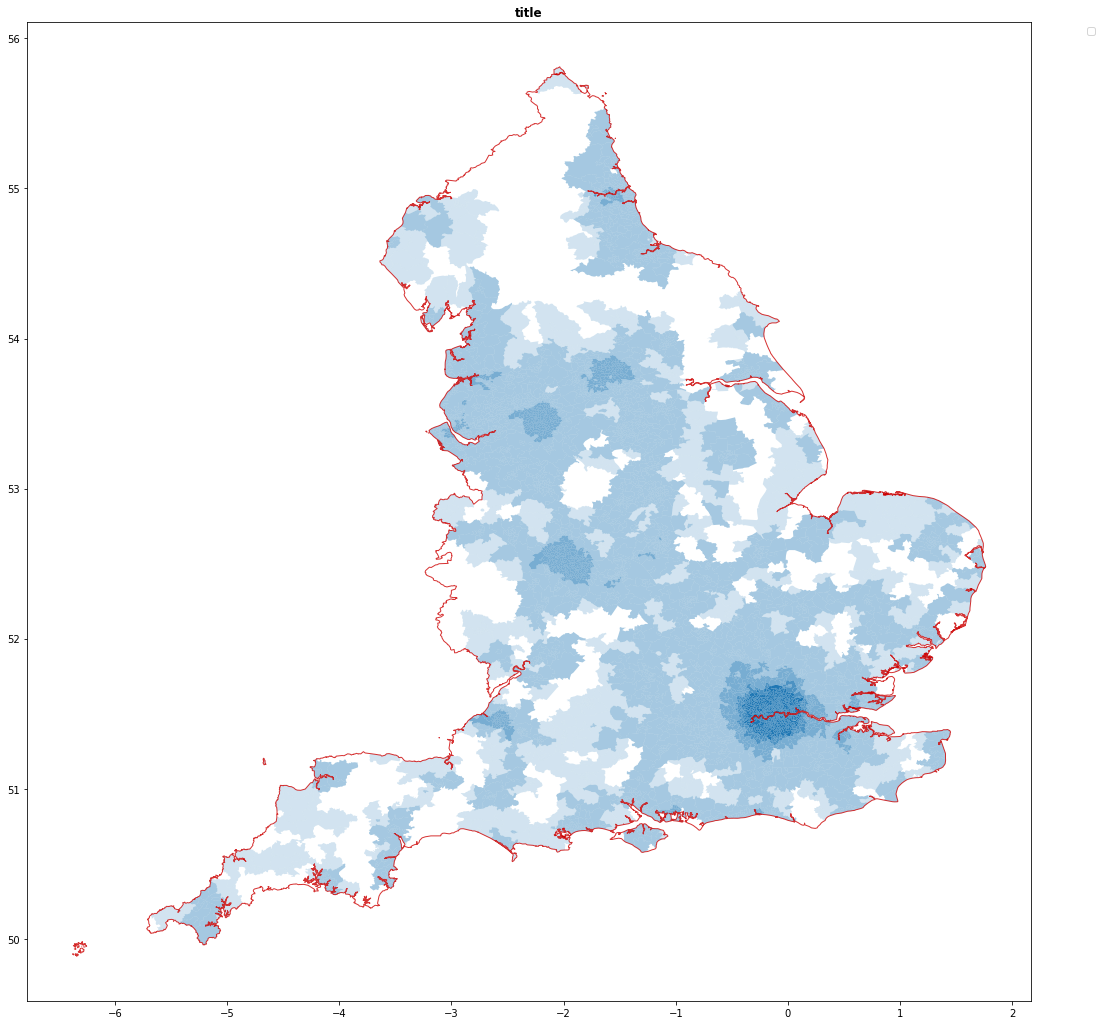

In [40]:
    fig, ax = plt.subplots(figsize=(18,18))
    legend_elements = []
    tract12.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.2)
    tract13.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.4)
    tract14.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.6)
    tract15.plot(figsize = (18,18),ax=ax,zorder=1,alpha=0.8)
    tract16.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract17.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    # tract18.plot(figsize = (18,18),ax=ax,zorder=1,alpha=1)
    MSOA_outline.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1,ax=ax)
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8), label='MSOAs with Vaccination Service'))
    # legend_elements.append(Patch(edgecolor=(0.8, 0, 0,0.8),facecolor='none',label='MSOAs Lack of Vaccination Service'))
    plt.gca().set_aspect('auto')
    plt.title('title', fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))